# INFERENTIAL STATISTICAL ANALYSIS OF THE PODCAST REVIEWS
-----------------------------------------------------------------------------------------------------------------------------

### **INTRODUCTION**
-------------------------------------------------------

#### **GOAL**
<br>These days data analysis is an essential part of technologies and other industries, observations of collected data provide the opportunity to understand user habits and inprove performance of technology, as well as to discover ideas for future. The purpose of this project was **to observe user habits, content of reviews and to understand Covid-19 impact on user habits**.

#### **APPROACH**
* Overview of general data about podcasts and reviews.
* Analysis of ratings by podcast and by category
* Analysis of ratings and reviews in time
* Analysis of content of reviews

#### **DATA USED**
<br>[Podcast Reviews Dataset](https://www.kaggle.com/thoughtvector/podcastreviews) from iTunes containing data about podcasts and reviews from 2005 to 2021.

<br>The main data was chosen from tables _Podcasts_ and _Reviews_.

------------------------
### IMPORTING PACKAGES AND DATA LOADING
-------------------------------------

In [101]:
import pandas as pd
import numpy as np
import sqlite3 as sql

# For visualisations
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# For statistical analysis
import statsmodels.api as sm
import scipy.stats.distributions as dist

# For display of multiple variables
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Loading data using pandas module and SQL:

In [102]:
conn = sql.connect("podcasts.sqlite")

categories = pd.read_sql_query("SELECT * FROM categories", conn)
podcasts = pd.read_sql_query("SELECT * FROM podcasts", conn)
reviews = pd.read_sql_query("SELECT * FROM reviews", conn)
runs = pd.read_sql_query("SELECT * FROM runs", conn)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Overview of tables:

In [103]:
print("Table of categories:")
categories.sample(5)
print("\nTable of podcasts:")
podcasts.sample(5)
print("\nTable of reviews:")
reviews.sample(5)
print("\nTable of runs:")
runs

Table of categories:


,podcast_id,category
3991,a59d6a481e98509e9027c5e5731736a3,society-culture-philosophy
6381,acf45407ed7918d79e84bf71d4acbf50,arts-visual-arts
28771,bbeb9ecc96a80937a237177884490b33,arts-performing-arts
26566,e382a2e2c46b034c1219bba7bd8edad6,kids-family
51536,d03294936160453c32ce6a2be1f12978,religion-spirituality



Table of podcasts:


,podcast_id,itunes_id,slug,itunes_url,title
31726,e1418409250c67cff38b8bec86e87878,404288166,this-my-show,https://podcasts.apple.com/us/podcast/this-my-...,This My Show
36475,eb09f7e201aa2e41f12a1982ec0f7ad8,529716383,church-so-blessed,https://podcasts.apple.com/us/podcast/church-s...,Church So Blessed
40176,f2a7926c28009a05d96d64f68e96ccd2,1448216060,jennifer-keegans-podcast,https://podcasts.apple.com/us/podcast/jennifer...,Jennifer Keegan's Podcast
8492,b183a3cc17356de5856428a5302a4e51,643325271,american-theatres-offscript,https://podcasts.apple.com/us/podcast/american...,American Theatre's Offscript
45369,fd63050e65e1fa90d4df3e5b24cf7085,1254788431,whoa-nessie,https://podcasts.apple.com/us/podcast/whoa-nes...,"Whoa, Nessie!"



Table of reviews:


,podcast_id,title,content,rating,author_id,created_at
447470,da2ddf7196603bea53c202951da48cc3,Great Show,Love Shawn’s ability to constantly get quality...,5,00BC1C3ED56BCCD,2018-08-06T13:49:32-07:00
1166273,c0deaddd87c334ed4ae858f3aa358943,Thank you,I live in Pasadena Texas and have listened to ...,5,FA838DA74B1B824,2021-02-11T01:07:15-07:00
629750,aacab22e041f4a2b971344ebb642d852,A must for Trek fans!,This is an amazing podcast! I started listenin...,5,D1F48EA4DBA683E,2013-02-28T19:00:00-07:00
256635,f8241f3de8aa0b35003ba2a78e509d35,Great Guests,"Wow, I learned tons more than I expected to li...",5,B19FA5BA83731C3,2017-02-03T11:28:15-07:00
796403,f430115943932e275bf116559a04f99b,Tremendous Value,I get so much value from the podcast. Always f...,5,3AADFF169008DF7,2015-05-08T16:55:54-07:00



Table of runs:


,run_at,max_rowid,reviews_added
0,2021-05-10 02:53:00,3266481,1215223
1,2021-06-06 21:34:36,3300773,13139
2,2021-07-02 18:04:55,3329699,11561
3,2021-08-01 17:54:42,3360315,11855
4,2021-09-02 18:00:30,3390165,11714
5,2021-10-11 05:18:23,3428923,16845


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

It was decided not to use table _Runs_ and conduct further analysis using tables: _Poscasts, Categories, Reviews.




++++++++

-------------------------------
### DATA EXPLORATION AND CLEANING
*****************************************************************

Observing information about data and checking for null values:

In [104]:
print("Table of podcasts:")
podcasts.info()
print("Table of categories:")
categories.info()
print("Table of reviews:")
reviews.info()

Table of podcasts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46693 entries, 0 to 46692
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   podcast_id  46693 non-null  object
 1   itunes_id   46693 non-null  int64 
 2   slug        46693 non-null  object
 3   itunes_url  46693 non-null  object
 4   title       46693 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.8+ MB
Table of categories:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70991 entries, 0 to 70990
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   podcast_id  70991 non-null  object
 1   category    70991 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB
Table of reviews:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1280337 entries, 0 to 1280336
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Visual representation of miising values:

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

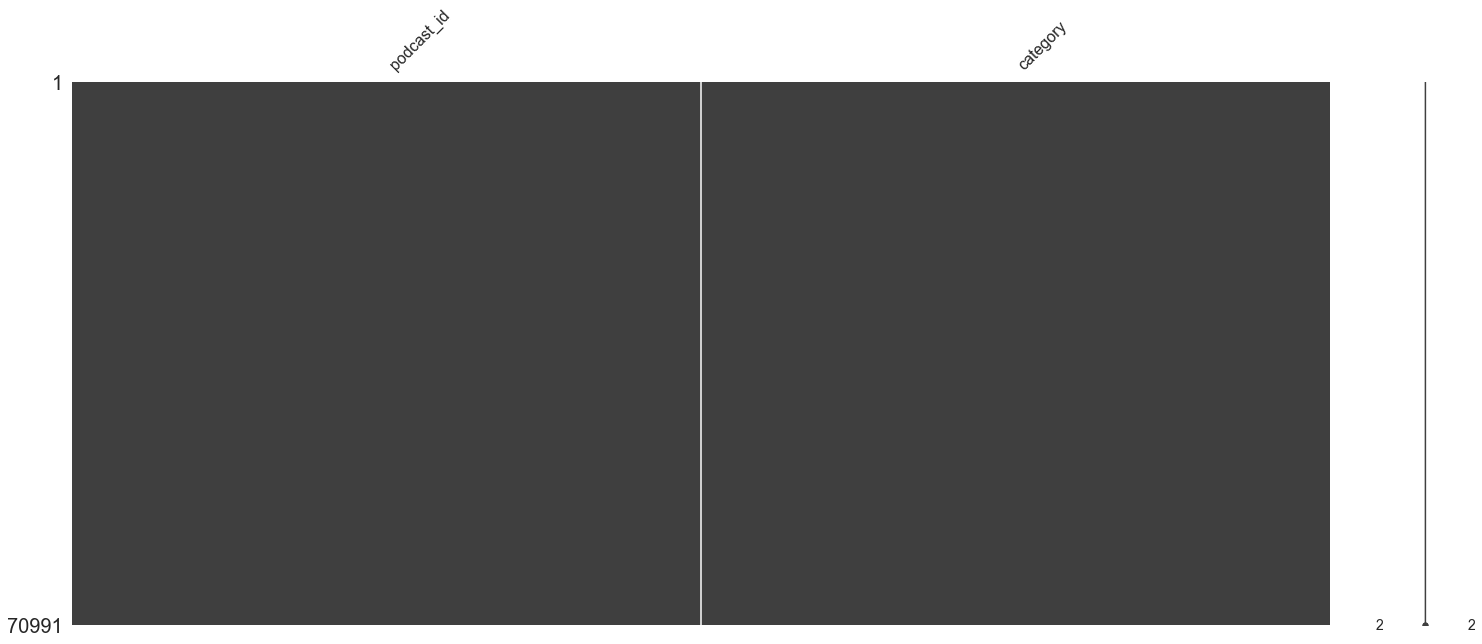

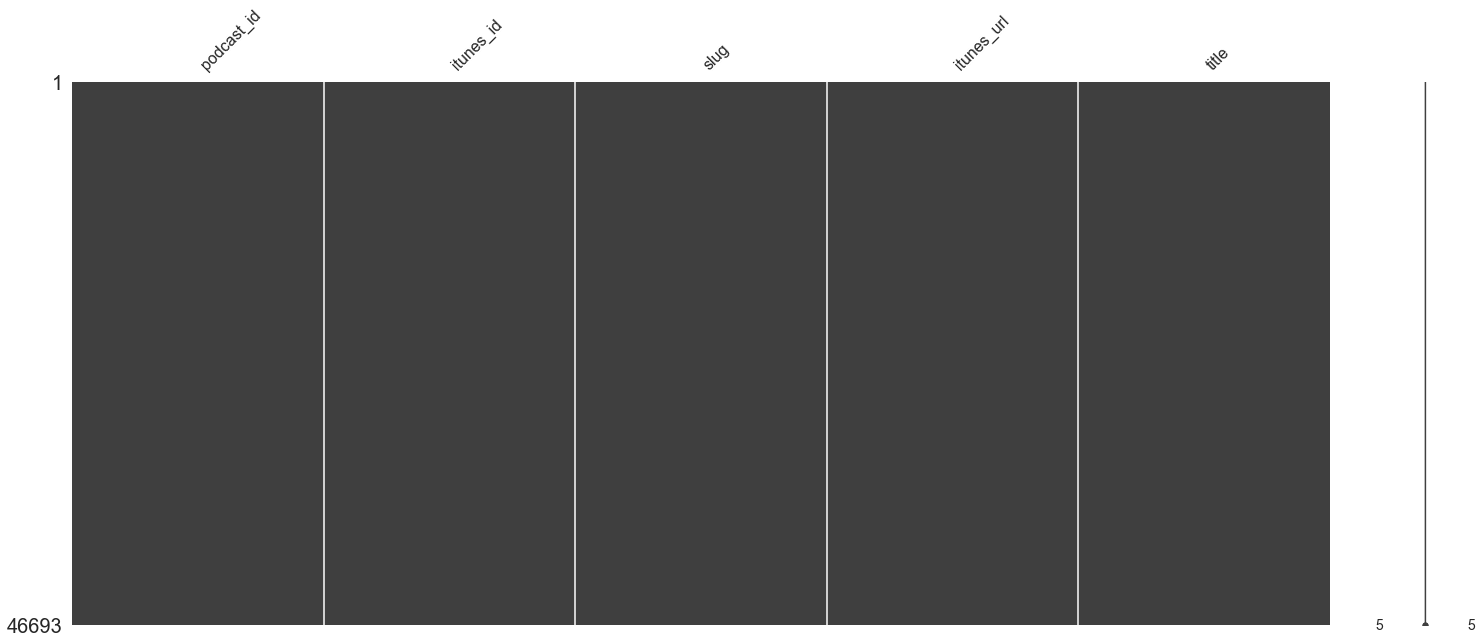

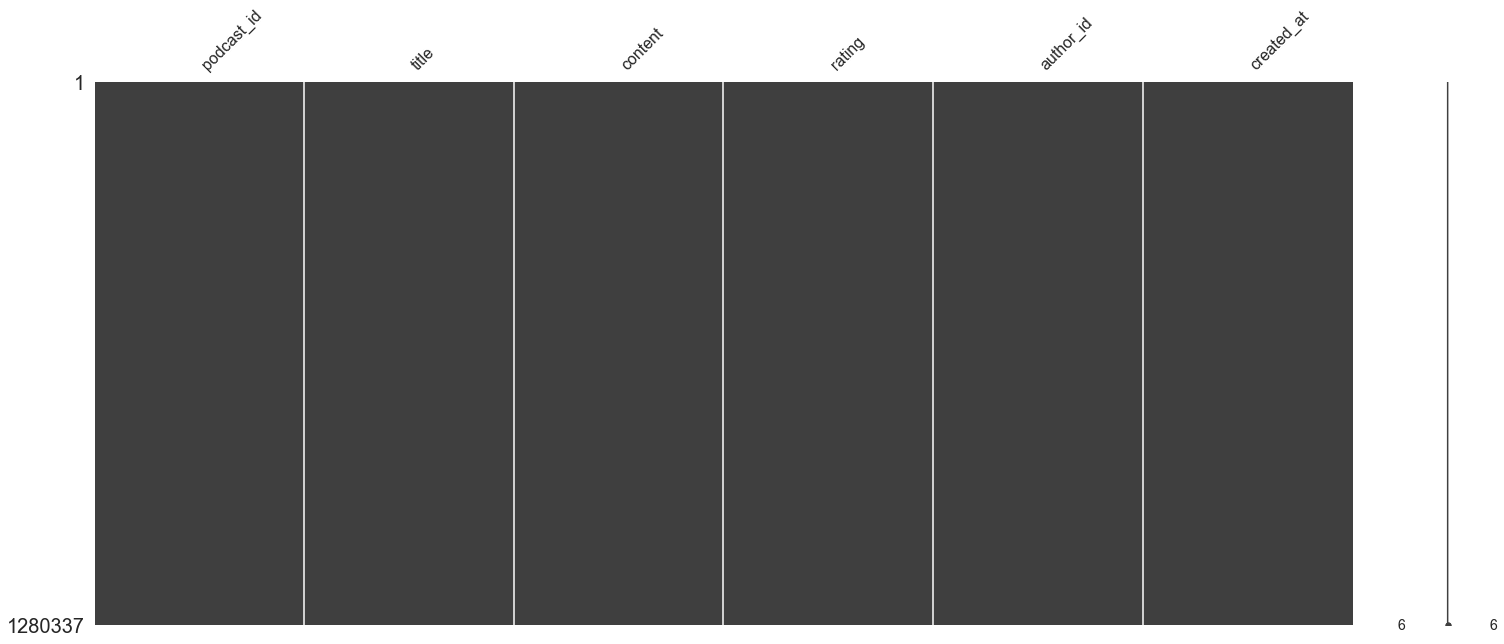

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [105]:
msno.matrix(categories)
msno.matrix(podcasts)
msno.matrix(reviews)

Overview of basic data:

In [106]:
# Getting number of podcasts

podcast_num = pd.read_sql_query(
    """SELECT COUNT(DISTINCT podcast_id) AS podcasts_number
                                   FROM podcasts""",
    conn,
)

print(f"The dataset contains data about {podcast_num.iloc[0, 0]} poscasts.")

The dataset contains data about 46693 poscasts.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [107]:
# Getting number of categories

categories_num = pd.read_sql_query(
    """SELECT COUNT(DISTINCT category) AS categories_number
                                      FROM categories """,
    conn,
)

print(f"Poscasts are divided into {categories_num.iloc[0, 0]} categories.")

Poscasts are divided into 26 categories.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [108]:
categories["category"].unique()

array(['arts', 'arts-performing-arts', 'music', 'arts-design',
       'education', 'society-culture', 'arts-visual-arts', 'technology',
       'arts-food', 'society-culture-personal-journals', 'comedy',
       'arts-fashion-beauty', 'tv-film', 'society-culture-places-travel',
       'kids-family', 'religion-spirituality', 'business',
       'society-culture-philosophy', 'spirituality', 'business-careers',
       'christianity', 'hinduism', 'business-investing', 'judaism',
       'islam', 'buddhism'], dtype=object)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

It may be seen that some categories are similar, for that reason it was decided to group podcasts in more abstract groups before further data exploration.

Creating new dataset **_MainData_** by joining tables _Poscasts, Reviews and Categories_ together. Also, data cleaning and preparation of new dataset will be performed futher in this section.

In [109]:
# Joining podcasts, reviews, categories tables together

MainData = pd.read_sql_query(
    """SELECT *
                            FROM (SELECT * FROM podcasts AS p LEFT JOIN categories AS c ON p.podcast_id = c.podcast_id) AS t0
                            LEFT JOIN reviews AS r ON r.podcast_id = t0.podcast_id""",
    conn,
)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [110]:
MainData.head(3)

,podcast_id,itunes_id,slug,itunes_url,title,podcast_id:1,category,podcast_id,title,content,rating,author_id,created_at
0,a00018b54eb342567c94dacfb2a3e504,1313466221,scaling-global,https://podcasts.apple.com/us/podcast/scaling-...,Scaling Global,a00018b54eb342567c94dacfb2a3e504,business,a00018b54eb342567c94dacfb2a3e504,Very informative,Great variety of speakers!,5,CC47C85896D423B,2017-11-29T12:16:43-07:00
1,a00043d34e734b09246d17dc5d56f63c,158973461,cornerstone-baptist-church-of-orlando,https://podcasts.apple.com/us/podcast/cornerst...,Cornerstone Baptist Church of Orlando,a00043d34e734b09246d17dc5d56f63c,christianity,a00043d34e734b09246d17dc5d56f63c,Good Sernons,I'm a regular listener. I only wish that the ...,5,103CC9DA2046218,2019-10-08T04:23:32-07:00
2,a00043d34e734b09246d17dc5d56f63c,158973461,cornerstone-baptist-church-of-orlando,https://podcasts.apple.com/us/podcast/cornerst...,Cornerstone Baptist Church of Orlando,a00043d34e734b09246d17dc5d56f63c,religion-spirituality,a00043d34e734b09246d17dc5d56f63c,Good Sernons,I'm a regular listener. I only wish that the ...,5,103CC9DA2046218,2019-10-08T04:23:32-07:00


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [111]:
# Getting information about dataset and checking for null values

MainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1566431 entries, 0 to 1566430
Data columns (total 13 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   podcast_id    1566431 non-null  object
 1   itunes_id     1566431 non-null  int64 
 2   slug          1566431 non-null  object
 3   itunes_url    1566431 non-null  object
 4   title         1566431 non-null  object
 5   podcast_id:1  1566431 non-null  object
 6   category      1566431 non-null  object
 7   podcast_id    1566431 non-null  object
 8   title         1566431 non-null  object
 9   content       1566431 non-null  object
 10  rating        1566431 non-null  int64 
 11  author_id     1566431 non-null  object
 12  created_at    1566431 non-null  object
dtypes: int64(2), object(11)
memory usage: 155.4+ MB


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [112]:
# Renaming duplicated columns

MainData = MainData.rename(columns={"podcast_id:1": "podcast_id"})

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [113]:
# Removing duplicated columns

MainData = MainData.loc[:, ~MainData.columns.duplicated()]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [114]:
# Removing columns that are not necessary for further analysis

MainData.drop(["slug", "itunes_url", "itunes_id"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [115]:
# Grouping categories of podcasts into more abstract groups

podcasts_groups = {
    "arts": [
        "arts",
        "arts-performing-arts",
        "music",
        "arts-design",
        "arts-visual-arts",
        "arts-food",
        "arts-fashion-beauty",
        "tv-film",
    ],
    "society-culture": [
        "society-culture",
        "society-culture-personal-journals",
        "society-culture-places-travel",
        "society-culture-philosophy",
    ],
    "religion-spirituality": [
        "religion-spirituality",
        "spirituality",
        "christianity",
        "hinduism",
        "judaism",
        "islam",
        "buddhism",
    ],
    "business": ["business", "business-careers", "business-investing"],
    "technology": ["technology"],
    "education": ["education"],
    "comedy": ["comedy"],
    "family": ["kids-family"],
}


def assign_group(x: str) -> str:
    """Assigniing string to a group from dictionary"""
    x = x.lower()

    for key, values in podcasts_groups.items():
        for item in values:
            if item in x:
                return key


# Adding column into dataset

MainData["group"] = MainData["category"].apply(assign_group)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [116]:
MainData.head(3)

,podcast_id,title,category,content,rating,author_id,created_at,group
0,a00018b54eb342567c94dacfb2a3e504,Scaling Global,business,Great variety of speakers!,5,CC47C85896D423B,2017-11-29T12:16:43-07:00,business
1,a00043d34e734b09246d17dc5d56f63c,Cornerstone Baptist Church of Orlando,christianity,I'm a regular listener. I only wish that the ...,5,103CC9DA2046218,2019-10-08T04:23:32-07:00,religion-spirituality
2,a00043d34e734b09246d17dc5d56f63c,Cornerstone Baptist Church of Orlando,religion-spirituality,I'm a regular listener. I only wish that the ...,5,103CC9DA2046218,2019-10-08T04:23:32-07:00,religion-spirituality


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [117]:
# Removing column of categories, becouse categories are changed with more abstract groups

MainData.drop("category", axis=1, inplace=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [118]:
# Checking for duplicated values

MainData.duplicated()

0          False
1          False
2           True
3          False
4           True
           ...  
1566426    False
1566427    False
1566428    False
1566429    False
1566430    False
Length: 1566431, dtype: bool

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [119]:
# Dropping duplicated rows

MainData.drop_duplicates(inplace=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [120]:
# Length of dataset after reorganization

len(MainData)

1258512

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [121]:
MainData.head(3)

,podcast_id,title,content,rating,author_id,created_at,group
0,a00018b54eb342567c94dacfb2a3e504,Scaling Global,Great variety of speakers!,5,CC47C85896D423B,2017-11-29T12:16:43-07:00,business
1,a00043d34e734b09246d17dc5d56f63c,Cornerstone Baptist Church of Orlando,I'm a regular listener. I only wish that the ...,5,103CC9DA2046218,2019-10-08T04:23:32-07:00,religion-spirituality
3,a0004b1ef445af9dc84dad1e7821b1e3,Mystery: Dancing in the Dark,Thts so weird... However made tht is weird. Du...,1,9D7AB51348639C7,2011-09-06T14:11:08-07:00,religion-spirituality


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Further analysis of main dataset will be performed.
<br>It was decided to create a table containing information about distribution of categories (groups).

In [122]:
# Number of podcasts

podcast_num = len(MainData["podcast_id"].unique())

podcast_num

46693

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [123]:
# Creating new dataset containing data about distribution of categories

PodcastsGroups = (
    MainData.groupby("group")
    .agg(podcasts_number=("podcast_id", "nunique"))
    .sort_values(by="podcasts_number", ascending=False)
)
PodcastsGroups["percentage"] = round(
    PodcastsGroups["podcasts_number"] * 100 / podcast_num, 2
)

PodcastsGroups

,podcasts_number,percentage
group,,
arts,14034,30.06
society-culture,10194,21.83
comedy,8080,17.30
religion-spirituality,7799,16.70
business,6269,13.43
education,5334,11.42
technology,2328,4.99
family,1657,3.55


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Presenting data about the distribution of categories visually:

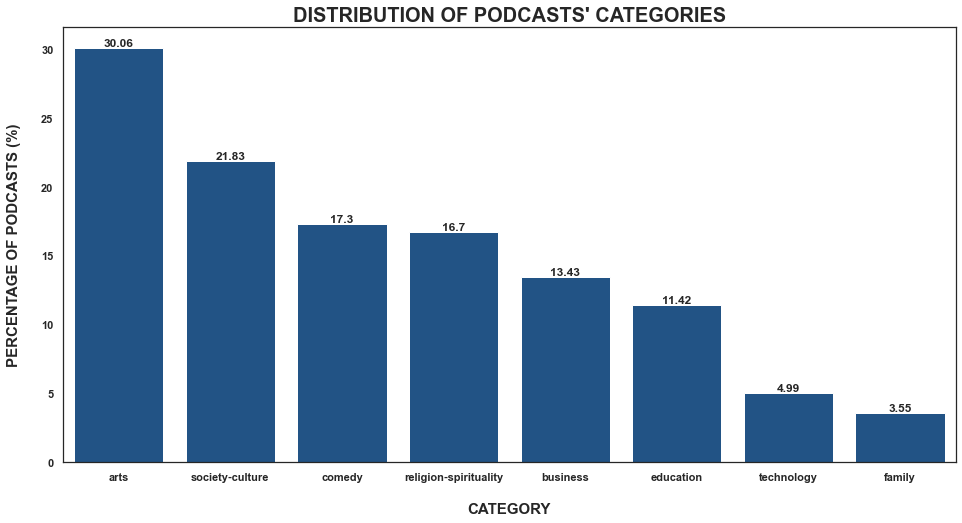

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [124]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.barplot(x=PodcastsGroups.index, y=PodcastsGroups["percentage"], color="#115396")
plt.xlabel("CATEGORY", size=15, labelpad=20, fontweight="bold")
plt.ylabel("PERCENTAGE OF PODCASTS (%)", size=15, labelpad=20, fontweight="bold")
plt.title("DISTRIBUTION OF PODCASTS' CATEGORIES", size=20, weight="bold")
plt.yticks(fontweight="bold")
plt.xticks(fontweight="bold")


def bar_values(ax):
    """presenting bar value on top"""
    for p in ax.patches:
        _x = p.get_x() + p.get_width() / 2
        _y = p.get_y() + p.get_height()
        value = f"{(p.get_height())}"
        ax.text(
            _x,
            _y,
            value,
            verticalalignment="bottom",
            ha="center",
            fontsize=12,
            fontweight="semibold",
        )


bar_values(ax);

Data shows that the majority of podcasts are in arts and society-culture categories. Least amount of podcasts is classified as technology related or covering familly topics.
<br>It is worth mentioning that some podcasts are attributed more than one category.



++++ podcastai su keliomis kategorijomis
+++ vienodi pavadimai/slug

-------------------------------
#### ANALYSIS OF RATINGS
------------------------------

Podcasts can be assign from 1 to 5 marks in iTunes platform.
<br>In further analysis it was decided to treat podcasts that are marked more than 3 as positively rated and podcasts marked less than 3 as negatively rated, leaving mark 3 as neutral.

In [125]:
# Getting main statistics about rating of podcasts

RatingMode = reviews["rating"].mode()
RatingMedian = reviews["rating"].median()
RatingMean = reviews["rating"].mean()

print(
    f"Mode: {RatingMode.to_string(index=False)},\nMedian: {RatingMedian},\nAverage: {round(RatingMean, 2)}."
)

Mode:  5,
Median: 5.0,
Average: 4.62.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

It may be seen that most of podcasts were given 5 points as both mode and median are equal to 5 and the value of mean rating is very high, too.

#### RATING ANALYSIS BY PODCAST
-----------------------

Overview of best and worst rated podcasts:

<br>Podcast having more reviews is considered as having more weigth.

In [126]:
PodcastsRatingBest = pd.read_sql_query(
    """SELECT p.title AS Title, c.category AS Category, AVG(rating) AS AvgRating, COUNT(*) AS ReviewsNumber
                            FROM (podcasts AS p LEFT JOIN categories AS c ON p.podcast_id = c.podcast_id) AS t0
                            LEFT JOIN reviews AS r ON r.podcast_id = t0.podcast_id
                            GROUP BY 1
                            ORDER BY 3 DESC, 4 DESC""",
    conn,
)

print("5 best rated podcasts")
PodcastsRatingBest.head(5)

5 best rated podcasts


,Title,Category,AvgRating,ReviewsNumber
0,Ramblin' Radio with Zack Kravits,arts,5.0,584
1,I Think You're Dope w/ Eric Nam,music,5.0,538
2,Drink in the Movies,society-culture,5.0,534
3,Garage Gym Athlete,society-culture,5.0,498
4,Cultivate Your Life with Lara Casey,christianity,5.0,438


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [127]:
PodcastRatingWorst = pd.read_sql_query(
    """SELECT p.title AS Title, c.category AS Category, AVG(rating) AS AvgRating, COUNT(*) AS ReviewsNumber
                            FROM (podcasts AS p LEFT JOIN categories AS c ON p.podcast_id = c.podcast_id) AS t0
                            LEFT JOIN reviews AS r ON r.podcast_id = t0.podcast_id
                            GROUP BY 1
                            ORDER BY 3, 4 DESC""",
    conn,
)

print("\n5 worst rated podcasts")
PodcastRatingWorst.head(5)


5 worst rated podcasts


,Title,Category,AvgRating,ReviewsNumber
0,Understanding World Religions,christianity,1.0,45
1,Hardcore History,education,1.0,12
2,True Crime Bookcast,education,1.0,12
3,Podcast Católico – Iglesia Católica,christianity,1.0,9
4,Thanksgiving Binge,society-culture,1.0,9


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Visual representation of rating distribution:

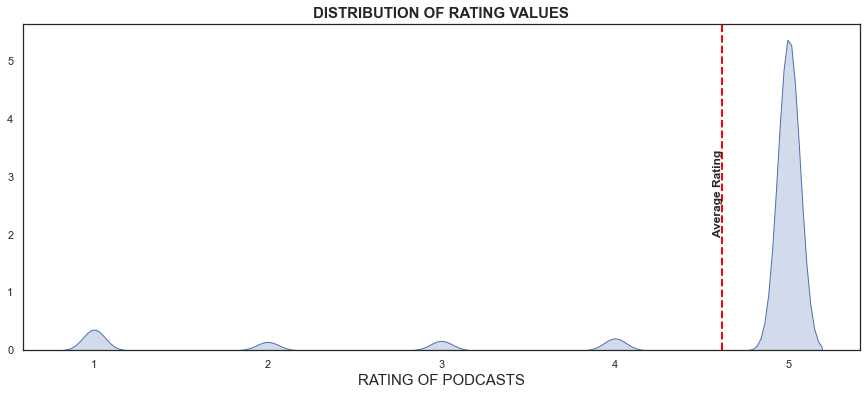

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [128]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.kdeplot(data=reviews["rating"], shade=True)
ax.set_ylabel("")
ax.set_xlabel("RATING OF PODCASTS", size=15)
plt.title("DISTRIBUTION OF RATING VALUES", fontsize=15, weight="bold")

plt.axvline(x=RatingMean, color="red", linewidth=2, linestyle="--")
ax.annotate(
    "Average Rating",
    xy=(RatingMean - 0.025, 2),
    ha="center",
    weight="bold",
    rotation=90,
);

As stated before, it may be seen that maximum value of rating dominates in comparison with other grades.

Visual representation of average rating distribution:

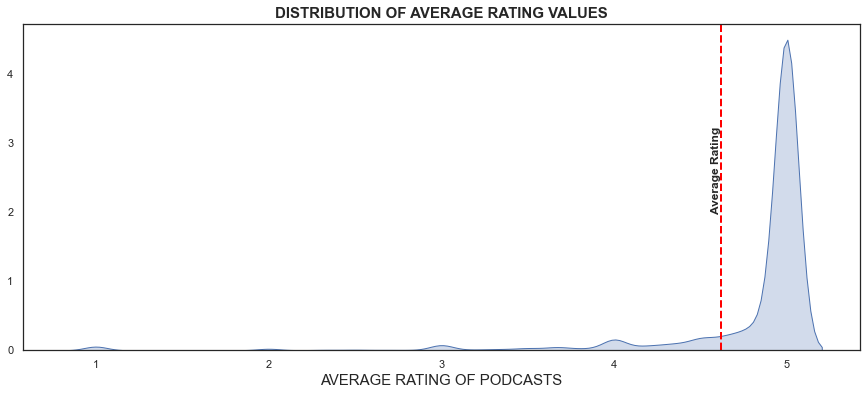

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [129]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.kdeplot(data=PodcastsRatingBest["AvgRating"], shade=True)
ax.set_ylabel("")
ax.set_xlabel("AVERAGE RATING OF PODCASTS", size=15)
plt.title("DISTRIBUTION OF AVERAGE RATING VALUES", fontsize=15, weight="bold")

plt.axvline(x=RatingMean, color="red", linewidth=2, linestyle="--")
ax.annotate(
    "Average Rating",
    xy=(RatingMean - 0.025, 2),
    ha="center",
    weight="bold",
    rotation=90,
);

Average rating follows similar trend as rating, but it is even more concentrated in right side of the plot.

It was attempted to discover if there is a relationship between average rating of podcast and number of reviews the podcast has. The visual representation of correlation may be seen below:

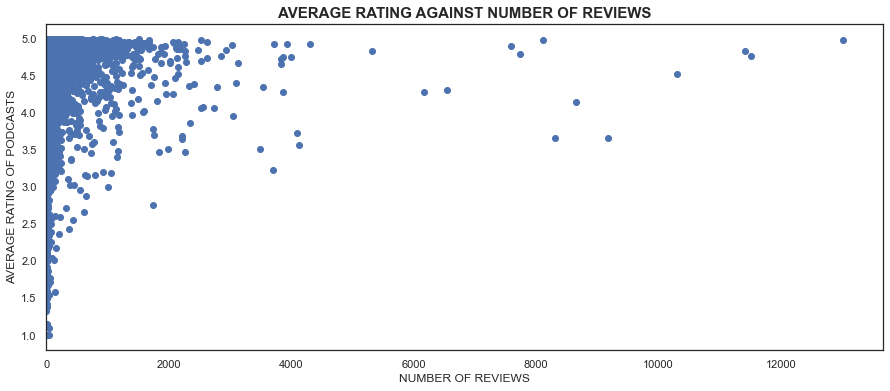

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [130]:
x = PodcastsRatingBest["ReviewsNumber"]
y = PodcastsRatingBest["AvgRating"]

fig, ax = plt.subplots(figsize=(15, 6))
ax.scatter(x, y)
ax.set_xlabel("NUMBER OF REVIEWS")
ax.set_ylabel("AVERAGE RATING OF PODCASTS")
plt.title("AVERAGE RATING AGAINST NUMBER OF REVIEWS", fontsize=15, weight="bold")
plt.xlim(left=0);

In [131]:
PodcastsRatingBest[["AvgRating", "ReviewsNumber"]].corr().replace(
    to_replace=1, value="-"
)

,AvgRating,ReviewsNumber
AvgRating,-,-0.0299248
ReviewsNumber,-0.0299248,-


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

It may be seen that correlation coefficient represented in the table is close to zero, consequently, it may be stated that average rating of podcast and number of reviews do not correlate. Also, plot shows that majority of podcasts have less than 2000 reviews, but there are quite a few exceptions. Wide range of reviews' number provoked further analysis of number of reviews.
<br>
<br>Observing podcasts having most and least reviews:

In [132]:
# getting podcasts having most reviews

MostReviewsPodcasts = pd.read_sql_query(
    """SELECT p.title AS Title, c.category AS Category, COUNT(*) AS ReviewsNumber, AVG(rating) AS AvgRating 
                            FROM (podcasts AS p LEFT JOIN categories AS c ON p.podcast_id = c.podcast_id) AS t0
                            LEFT JOIN reviews AS r ON r.podcast_id = t0.podcast_id
                            GROUP BY 1
                            ORDER BY 3 DESC""",
    conn,
)


print("Podcasts having most reviews")
MostReviewsPodcasts.head(5)

print("\nPodcasts having least reviews")
MostReviewsPodcasts.tail(5)

Podcasts having most reviews


,Title,Category,ReviewsNumber,AvgRating
0,Know Your Aura with Mystic Michaela,education,13017,4.987555
1,Story Pirates,comedy,11516,4.764328
2,Zane and Heath: Unfiltered,comedy,11409,4.837497
3,And That's Why We Drink,comedy,10296,4.530594
4,My Favorite Murder with Karen Kilgariff and Ge...,comedy,9173,3.665213



Podcasts having least reviews


,Title,Category,ReviewsNumber,AvgRating
46530,AAK Podcast,comedy,1,5.0
46531,A.S.S. Podcast,comedy,1,5.0
46532,A-Town at the Movies,tv-film,1,5.0
46533,A-Team Entertainment,music,1,5.0
46534,A Great Devotee of Rama and Krishna,hinduism,1,5.0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### IDENTIFYING OUTLIERS WITH INTERQARTILE RANGE (IQR) METHOD

As it was seen before, there is a wide range of number of reviews each podcast got. It was decided to explore this case more closely.

In [133]:
RieviewsStats = MostReviewsPodcasts["ReviewsNumber"].describe()

RieviewsStats

count    46535.000000
mean        33.661352
std        207.816230
min          1.000000
25%          2.000000
50%          4.000000
75%         14.000000
max      13017.000000
Name: ReviewsNumber, dtype: float64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

It may be seen that number of reviews differs from 1 to 13 000, but the average is 33,7, which let us to believe that most of podcasts has low number of reviews as it was seen before in the plot. Also, median in this case is 4, which confirms the previous idea.

In [134]:
Q1 = RieviewsStats.loc["25%"]
Q3 = RieviewsStats.loc["75%"]

IQR = Q3 - Q1

OutliersNumber = (
    (MostReviewsPodcasts["ReviewsNumber"] < (Q1 - 1.5 * IQR))
    | (MostReviewsPodcasts["ReviewsNumber"] > (Q3 + 1.5 * IQR))
).sum()

print(f"Number of identified outliers in number of reviews: {OutliersNumber}")

Number of identified outliers in number of reviews: 6285


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [135]:
OutliersPercentage = OutliersNumber / len(MostReviewsPodcasts["ReviewsNumber"]) * 100

print(
    f"Percentage of outliers in number of reviews data - {round(OutliersPercentage, 2)}%."
)

Percentage of outliers in number of reviews data - 13.51%.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

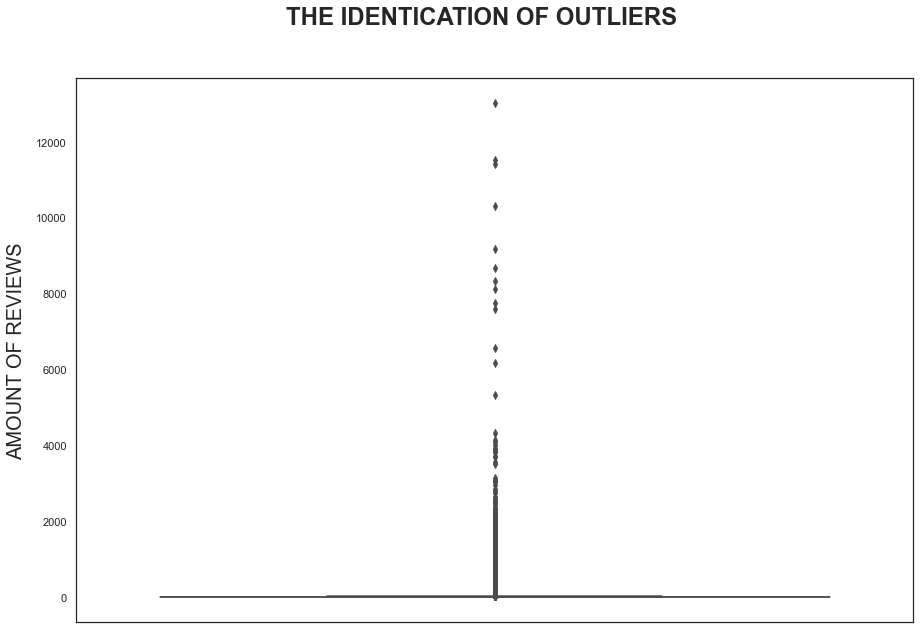

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [136]:
fig, axes = plt.subplots(figsize=(15, 10))
fig.suptitle("THE IDENTICATION OF OUTLIERS", fontsize=24, weight="bold")
sns.boxplot(data=MostReviewsPodcasts, y=MostReviewsPodcasts["ReviewsNumber"])
axes.set_ylabel("AMOUNT OF REVIEWS", size=20)
axes.yaxis.labelpad = 10
sns.set(style="white")

#### POSITIVE AND NEGATIVE RATING OF PODCASTS

It was obverved that poscasts are more usually evaluated positively than negatively and deeper analysis of this case was performed.

In [137]:
LenReviews = len(reviews)

print(f"Total number of reviews: {LenReviews}.")

Total number of reviews: 1280337.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [138]:
PositiveReviews = pd.read_sql_query(
    """SELECT * 
                            FROM reviews
                            WHERE rating > 3""",
    conn,
)


print(f"Number of positive reviews: {len(PositiveReviews)}.")

pPositive = len(PositiveReviews) / LenReviews
print(f"Percentage of positive reviews: {round(pPositive*100, 2)}%.")

Number of positive reviews: 1143685.
Percentage of positive reviews: 89.33%.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [139]:
NegativeReviews = pd.read_sql_query(
    """SELECT *
                            FROM reviews
                            WHERE rating < 3""",
    conn,
)


print(f"Number of negative reviews: {len(NegativeReviews)}.")

pNegative = len(NegativeReviews) / LenReviews
print(f"Percentage of negative reviews: {round(pNegative*100, 2)}%.")

Number of negative reviews: 103184.
Percentage of negative reviews: 8.06%.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [140]:
ReviewsDiff = round((pPositive - pNegative) * 100, 2)

print(f"Positive reviews are {ReviewsDiff}% more frequent than negative reviews.")

Positive reviews are 81.27% more frequent than negative reviews.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

-----------------------
#### RATING ANALYSIS BY CATEGORY
------------------

The table below represents average rating of each category together with number of reviews and podcasts: 

In [141]:
GroupRating = (
    MainData.groupby("group")
    .agg(
        AvgRating=("rating", "mean"),
        ReviewsNumber=("podcast_id", "count"),
        PodcastsNumber=("podcast_id", "nunique"),
    )
    .sort_values(by=["AvgRating", "ReviewsNumber"], ascending=False)
)

GroupRating

,AvgRating,ReviewsNumber,PodcastsNumber
group,,,
business,4.825640,139327,6269
religion-spirituality,4.810244,98384,7799
education,4.794860,119840,5334
family,4.747242,66902,1657
arts,4.636179,251596,14034
comedy,4.634218,256776,8080
society-culture,4.543400,290125,10194
technology,4.536022,35562,2328


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

It seems that the range of average rating for categories is really narrow - from 4.54 to 4.83. Technology related podcasts have lowest rating and lowest engrossment of audience, on the contrary, comedy genre attracted the most reviews.

Overview of mostly reviewed categories:

In [142]:
# Getting categories that have most reviews

MostReviewsCategories = pd.read_sql_query(
    """SELECT c.category AS Category, COUNT(*) AS ReviewsNumber, COUNT(DISTINCT c.podcast_id) AS PodcastsNumber, AVG(rating) AS AvgRating  
                        FROM reviews AS r JOIN categories AS c ON c.podcast_id = r.podcast_id
                        GROUP BY 1
                        ORDER BY 2 DESC""",
    conn,
)


MostReviewsCategories.head(5)

,Category,ReviewsNumber,PodcastsNumber,AvgRating
0,society-culture,286061,10073,4.540532
1,comedy,256910,8080,4.634242
2,business,135458,6208,4.825437
3,tv-film,124324,5130,4.518082
4,education,119906,5334,4.794773


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

It was attempted to discover if there is a relationship between average rating of category and number of reviews the category has. The visual representation of correlation may be seen below:

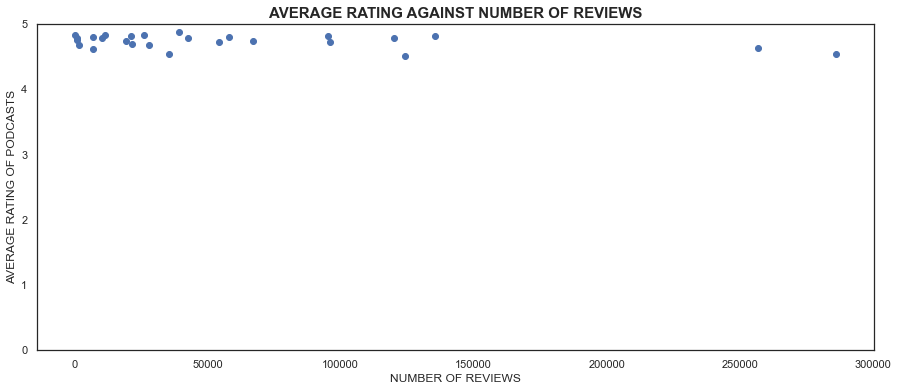

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [143]:
x = MostReviewsCategories["ReviewsNumber"]
y = MostReviewsCategories["AvgRating"]

fig, ax = plt.subplots(figsize=(15, 6))
ax.scatter(x, y)
ax.set_xlabel("NUMBER OF REVIEWS")
ax.set_ylabel("AVERAGE RATING OF PODCASTS")
plt.title("AVERAGE RATING AGAINST NUMBER OF REVIEWS", fontsize=15, weight="bold")
plt.ylim(bottom=0, top=5);

In [144]:
MostReviewsCategories[["ReviewsNumber", "AvgRating"]].corr().replace(
    to_replace=1, value="-"
)

,ReviewsNumber,AvgRating
ReviewsNumber,-,-0.424332
AvgRating,-0.424332,-


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The plot shows that ratings of each category are similar, but there is more variety in number of reviews. The coefficient of correlation represents week negative relationship between number of reviews and average rating of category.

**HYPOTHESIS TESTING** - Comparison of average rating of arts and society-culture categories.

In [145]:
DataArts = MainData[MainData["group"] == "arts"].copy()
DataArts = DataArts["rating"]

DataCulture = MainData[MainData["group"] == "society-culture"].copy()
DataCulture = DataCulture["rating"]

print(
    f"Average rating of podcasts in arts category μ1: {round(DataArts.mean(), 2)},\nAverage rating of podcasts in society-culture category μ2: {round(DataCulture.mean(), 2)}"
)

Average rating of podcasts in arts category μ1: 4.64,
Average rating of podcasts in society-culture category μ2: 4.54


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**HYPOTHESIS 0** - There is no significant difference in average rating of podcasts between society-culture and arts categories.
<br>**H0: μ1=μ2**
<br>**HYPOTHESIS 1** - There is a significant difference in average rating of podcasts between society-culture and arts categories.
<br>**H1: μ1≠μ2**

<br>**Significance level is 5%.**
<br>**α = 0.05**

In [146]:
alpha = 0.05

group_t_stats, group_p_value, degreesf = sm.stats.ttest_ind(DataArts, DataCulture)
print(
    "T-statistics value: {}".format(round(group_t_stats, 3)),
    "\n",
    "P-value: {}".format(round(group_p_value, 5)),
)

T-statistics value: 31.339 
 P-value: 0.0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [147]:
if group_p_value > alpha:
    print("We fail to reject null hypothesis.")
else:
    print("We reject the null hypothesis.")

We reject the null hypothesis.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**CONCLUSION**
<br>There is a sufficient evidence to conclude that mean difference between rating of two categories is significantly different.

-----------------------
#### ANALYSIS OF TIME DATA
-----------------------------

A new data frame _DatesInfo_ storing truncated time data was created:

In [148]:
# Creating new data frame for data of reviews' dates

DatesInfo = pd.DataFrame()
DatesInfo["OriginalDate"] = pd.to_datetime(reviews["created_at"]).copy()

# Truncation by day
DatesInfo["TruncDay"] = DatesInfo["OriginalDate"].dt.to_period("D").dt.to_timestamp()

# Truncation by day of week
DatesInfo["WeekDay"] = DatesInfo["OriginalDate"].dt.dayofweek

# Truncation of day time
DatesInfo["DayTime"] = DatesInfo["OriginalDate"].dt.strftime("%H:%M")

DatesInfo.sample(5)

C:\Users\Erika\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1088: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


,OriginalDate,TruncDay,WeekDay,DayTime
811647,2019-07-15 19:33:01-07:00,2019-07-15,0,19:33
1039663,2020-07-30 16:41:11-07:00,2020-07-30,3,16:41
551268,2019-03-21 21:30:17-07:00,2019-03-21,3,21:30
981065,2020-05-13 01:05:45-07:00,2020-05-13,2,01:05
1223889,2021-05-25 18:51:23-07:00,2021-05-25,1,18:51


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [149]:
DateInfo1 = DatesInfo["TruncDay"].sort_values(ascending=True)
DateInfo1 = DateInfo1.reset_index()
DateInfo1.drop("index", axis=1, inplace=True)

FirstDay = DateInfo1.iloc[0].to_string(index=False)
LastDay = DateInfo1.iloc[-1].to_string(index=False)

print(f"Dataset stores reviews from {FirstDay} to {LastDay}.")

Dataset stores reviews from 2005-12-09 to 2021-10-09.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### ANALYSIS OF REVIEWS DISTRIBUTION IN TIME

In [150]:
# Group by date
GroupedDates = DatesInfo.groupby(["TruncDay"]).agg(ReviewsCount=("TruncDay", "count"))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

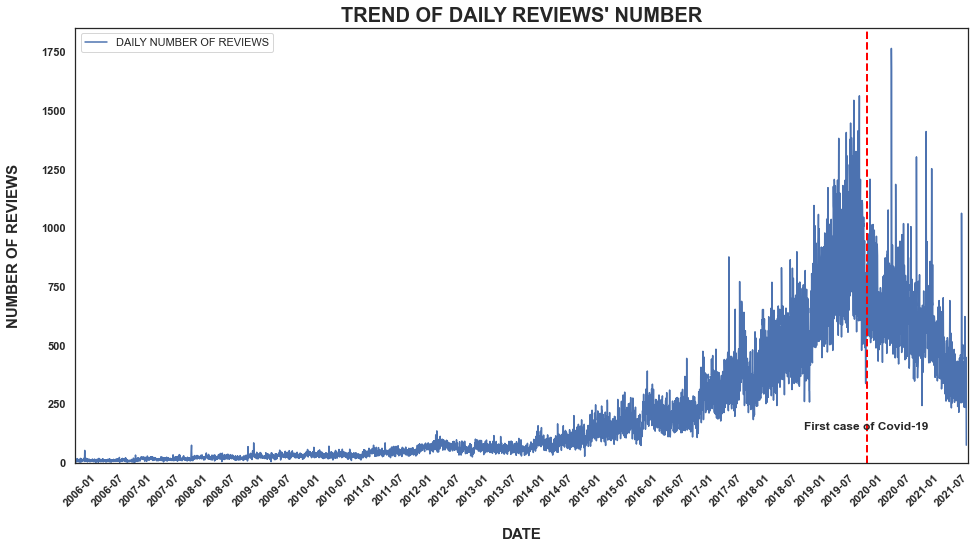

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [151]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(16, 8))
sns.lineplot(
    x=GroupedDates.index,
    y=GroupedDates["ReviewsCount"],
    palette="dark",
    label="DAILY NUMBER OF REVIEWS",
)

plt.axvline(x="2019-12-31", color="red", linewidth=2, linestyle="--")
ax.annotate(
    "First case of Covid-19",
    xy=("2019-12-31", 142),
    ha="center",
    weight="bold",
)


plt.xlabel("DATE", size=15, labelpad=20, fontweight="bold")
plt.ylabel("NUMBER OF REVIEWS", size=15, labelpad=20, fontweight="bold")
plt.title("TREND OF DAILY REVIEWS' NUMBER", size=20, weight="bold")
plt.yticks(fontweight="bold")
plt.xticks(fontweight="bold", rotation=45)
ax.set_ylim(ymin=0)
ax.set_xlim(xmin="2005-12-01", xmax="2021-10-20")
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6));

The plot above represents how daily number of reviews varies through period of data collection. If assumed that number of reviews and views are correlated, the trend of growing interest in podcasts may be seen from the end of 2005 until the beggining of 2020. A decrease in daily reviews numbers coincides with the beginning of Covid-19 pandemy in the world, the connection appeared due to a fact that people tend to listen to podcasts in the car while commuting as well as at work or exercising, those activities were restricted since the beginning of pandemy.
<br>Source:https://www.buzzsprout.com/blog/podcast-statistics

#### ANALYSIS OF REVIEWS DISTRIBUTION IN TIME OF THE DAY

In [152]:
# Group by time of the day
GroupedDayTime = DatesInfo.groupby(["DayTime"]).agg(ReviewsCount=("DayTime", "count"))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

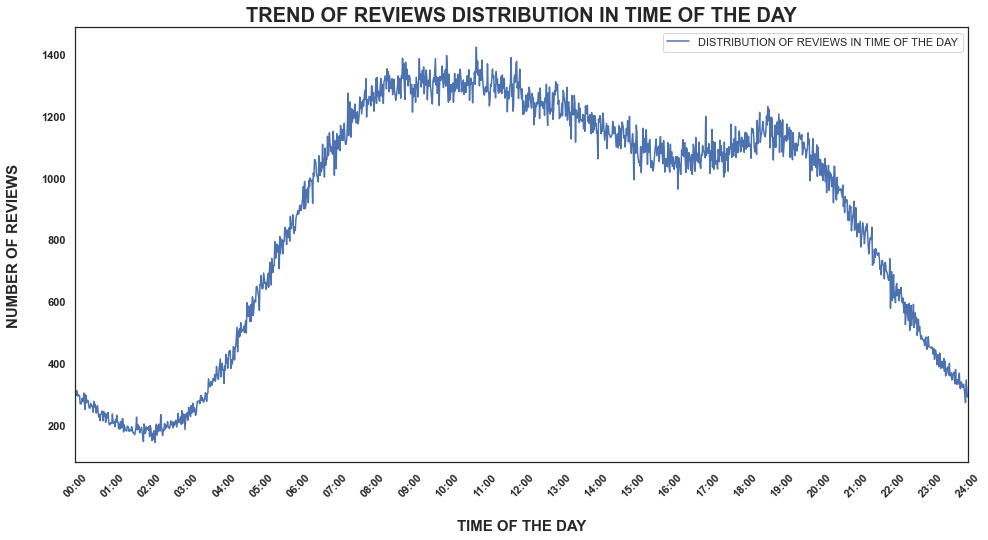

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [153]:
import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize=(16, 8))
sns.lineplot(
    x=GroupedDayTime.index,
    y=GroupedDayTime["ReviewsCount"],
    palette="dark",
    label="DISTRIBUTION OF REVIEWS IN TIME OF THE DAY",
)

plt.xlabel("TIME OF THE DAY", size=15, labelpad=20, fontweight="bold")
plt.ylabel("NUMBER OF REVIEWS", size=15, labelpad=20, fontweight="bold")
plt.title("TREND OF REVIEWS DISTRIBUTION IN TIME OF THE DAY", size=20, weight="bold")
plt.yticks(fontweight="bold")
plt.xticks(fontweight="bold", rotation=45)
ax.xaxis.set_major_locator(ticker.MaxNLocator(24))
ax.set_xlim(xmin="00:00", xmax="24:00");

Two peaks in the number of reviews may be seen through the day - from 7 to 12 o'clock and from 17 to 19, this complements the information about listening habits of users as peaks coincide with usual commuting time or usual time form working out.

#### ANALYSIS OF REVIEWS DISTRIBUTION THROUGH THE WEEK

In [154]:
# Grouping by day of the week and aggregating count of reviews
GroupedWeekDay = DatesInfo.groupby(["WeekDay"]).agg(ReviewsCount=("WeekDay", "count"))

# Counting percentage of reviews by days of the week
GroupedWeekDay["ReviewsPercentage"] = round(
    GroupedWeekDay["ReviewsCount"] * 100 / sum(GroupedWeekDay["ReviewsCount"]), 2
)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [155]:
# Renaming index to names of week days
GroupedWeekDay.reset_index(inplace=True)
GroupedWeekDay["WeekDay"].replace(
    {
        0: "Monday",
        1: "Tuesday",
        2: "Wednesday",
        3: "Thursday",
        4: "Friday",
        5: "Saturday",
        6: "Sunday",
    },
    inplace=True,
)
GroupedWeekDay.set_index("WeekDay", inplace=True)

GroupedWeekDay

,ReviewsCount,ReviewsPercentage
WeekDay,,
Monday,189480,14.80
Tuesday,212761,16.62
Wednesday,217015,16.95
Thursday,210056,16.41
Friday,187609,14.65
Saturday,131228,10.25
Sunday,132188,10.32


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

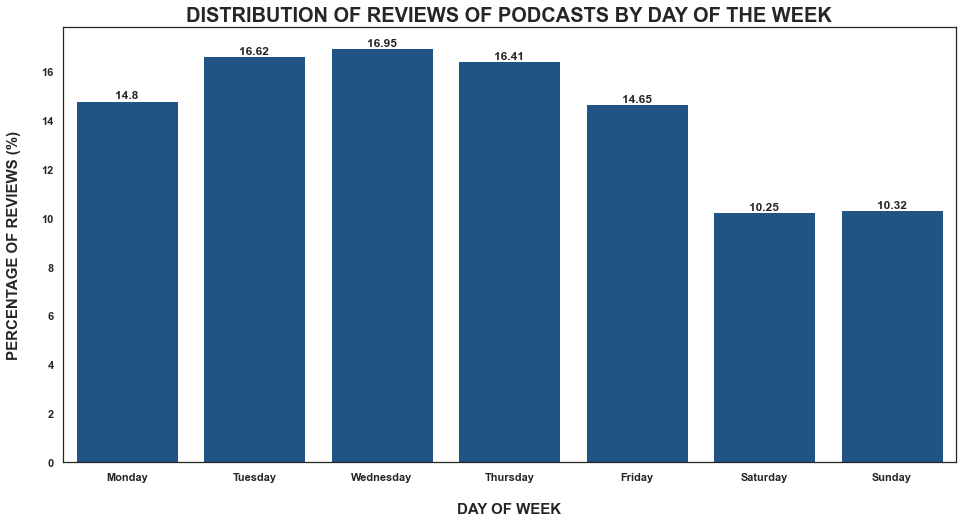

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [156]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.barplot(
    x=GroupedWeekDay.index, y=GroupedWeekDay["ReviewsPercentage"], color="#115396"
)
plt.xlabel("DAY OF WEEK", size=15, labelpad=20, fontweight="bold")
plt.ylabel("PERCENTAGE OF REVIEWS (%)", size=15, labelpad=20, fontweight="bold")
plt.title(
    "DISTRIBUTION OF REVIEWS OF PODCASTS BY DAY OF THE WEEK", size=20, weight="bold"
)
plt.yticks(fontweight="bold")
plt.xticks(fontweight="bold")
bar_values(ax);

It may be noticed that the amount of listeners grows from the beginning of the week and peaks in the middle and slowly decreases, weekends have significantly lower rate of reviews. The reason behind this trend may be the same user habits mentioned before.

**HYPOTHESIS TESTING** - Comparison of average number of reviews between working days and weekends.

In [157]:
WeekDays = GroupedWeekDay.loc["Monday":"Friday", "ReviewsCount"]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [158]:
WeekEnds = GroupedWeekDay.loc["Saturday":"Sunday", "ReviewsCount"]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [159]:
print(
    f"Average number of reviews during working days μ1: {round(WeekDays.mean(), 2)},\nAverage number of reviews during weekends μ2: {round(WeekEnds.mean(), 2)}"
)

Average number of reviews during working days μ1: 203384.2,
Average number of reviews during weekends μ2: 131708.0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**HYPOTHESIS 0** - There is no significant difference in average number of reviews between working days and weekends.
<br>**H0: μ1=μ2**
<br>**HYPOTHESIS 1** - There is a significant difference in average number of reviews between working days and weekends.
<br>**H1: μ1≠μ2**

<br>**Significance level is 5%.**
<br>**α = 0.05**

In [160]:
alpha = 0.05

group_t_stats, group_p_value, degreesf = sm.stats.ttest_ind(WeekDays, WeekEnds)
print(
    "T-statistics value: {}".format(round(group_t_stats, 3)),
    "\n",
    "P-value: {}".format(round(group_p_value, 5)),
)

T-statistics value: 6.945 
 P-value: 0.00095


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [161]:
if group_p_value > alpha:
    print("We fail to reject null hypothesis.")
else:
    print("We reject the null hypothesis.")

We reject the null hypothesis.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**CONCLUSION**
<br>There is a sufficient evidence to conclude that average reviews number between working days and weekend is significantly different.

#### ANALYSIS OF CHANGES IN AVERAGE RATING IN TIME

In [162]:
# Creating new data frame containing dates and rating of reviews

AvgRatingData = pd.DataFrame()
AvgRatingData["OriginalDate"] = pd.to_datetime(reviews["created_at"]).copy()
AvgRatingData["TruncDay"] = (
    AvgRatingData["OriginalDate"].dt.to_period("D").dt.to_timestamp()
)
AvgRatingData["Rating"] = reviews["rating"].copy()

C:\Users\Erika\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1088: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [163]:
# Grouping data by date and aggregating daily average rating

GroupedAvgRatingData = AvgRatingData.groupby(["TruncDay"]).agg(
    AverageRating=("Rating", "mean")
)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

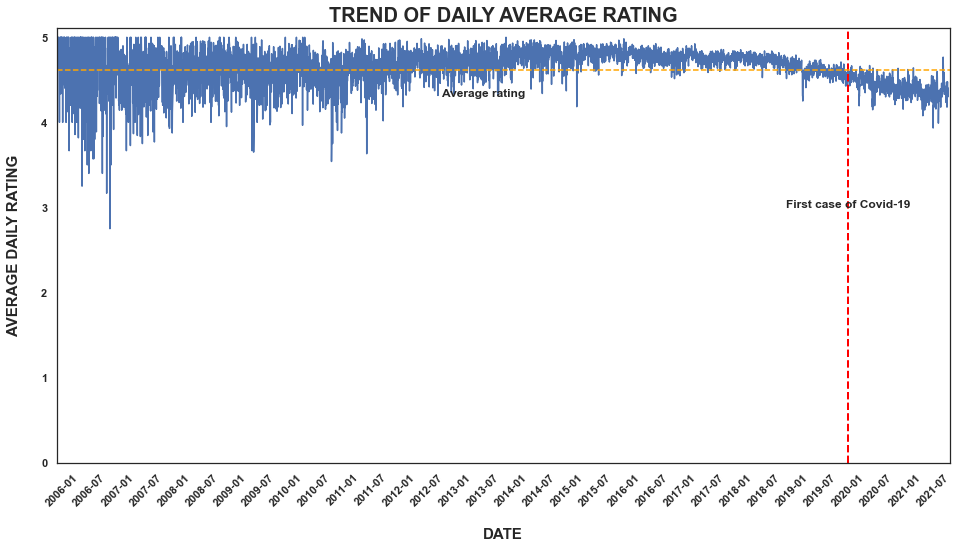

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [164]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.lineplot(
    x=GroupedAvgRatingData.index,
    y=GroupedAvgRatingData["AverageRating"],
    palette="dark",
)

plt.axvline(x="2019-12-31", color="red", linewidth=2, linestyle="--")
ax.annotate(
    "First case of Covid-19",
    xy=("2019-12-31", 3),
    ha="center",
    weight="bold",
)

plt.axhline(y=RatingMean, color="orange", linestyle="--")
ax.annotate(
    "Average rating",
    xy=("2013-07-05", 4.3),
    ha="center",
    weight="bold",
)


plt.xlabel("DATE", size=15, labelpad=20, fontweight="bold")
plt.ylabel("AVERAGE DAILY RATING", size=15, labelpad=20, fontweight="bold")
plt.title("TREND OF DAILY AVERAGE RATING", size=20, weight="bold")
plt.yticks(fontweight="bold")
plt.xticks(fontweight="bold", rotation=45)
ax.set_ylim(ymin=0)
ax.set_xlim(xmin="2005-12-01", xmax="2021-10-20")
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6));

It seems that average rating remained similar through period of data collection. In addition, it may be seen that the amplitude of ratings became more narrow.

---------------------
#### ANALYSIS OF CONTENT OF REVIEWS

-------------------

In this section, analysis will be focused on content and length of reviews and how these parameters are correlated with rating of review.

Creating new dataframe containing content, rating and length of each review:

In [165]:
ContentData = MainData[["content", "rating"]].copy()
ContentData["length"] = ContentData["content"].str.len()
ContentData = ContentData[~ContentData["content"].duplicated()]
ContentData.head()

,content,rating,length
0,Great variety of speakers!,5,26
1,I'm a regular listener. I only wish that the ...,5,144
3,Thts so weird... However made tht is weird. Du...,1,71
5,"So excited to have this come to reality, well ...",5,94
6,Inspiration & Information that transforms busi...,5,202


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Getting basic statistical information about the dataframe:

In [166]:
ContentData.describe()

,rating,length
count,977403.000000,977403.000000
mean,4.657211,245.790074
std,1.001767,249.260286
min,1.000000,20.000000
25%,5.000000,98.000000
50%,5.000000,181.000000
75%,5.000000,312.000000
max,5.000000,6000.000000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

It may be seen that majority of reviews are marked maximum, this information correlates with the hight mean rating of reviews and podcasts as well.
<br>Obviously, we can observe more various data in length column, there is a huge gap between minimum (20) and maximum (6000) length of reviews, which indicates different user habits. The average length of English word is 4.7 character, so number of words in review varies approximately from 4.3 to 1276.6 words, meaning that part of users could write practicly an essay as a review. In addition, the mean of length of review is 245.8 characters, meaning that average user types around 52 words in a text field. Moreover, mean length is larger than median of length (50% percentile) meaning that data is rightly (positively) skewed, having outliers on this side of the scale meaning that it is very unusual for user to type 6000 characters as a review of the podcasts.
<br>Source: https://www.wyliecomm.com/2021/11/whats-the-best-length-of-a-word-online/#:~:text=The%20average%20word%20in%20the%20English%20language%20is%204.7%20characters.

Exploring relationship between length and size of reviews:

In [167]:
ContentData[["rating", "length"]].corr().replace(to_replace=1, value="-")

,rating,length
rating,-,-0.0988914
length,-0.0988914,-


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The coefficient of correlation betweeen these two sizes is really close to zero, indicating that these parameters are not correlated.

In [168]:
# Grouping data by rating and aggregarting average length of review in each category

ContentLength = ContentData.groupby(["rating"]).agg(AverageLength=("length", "mean"))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

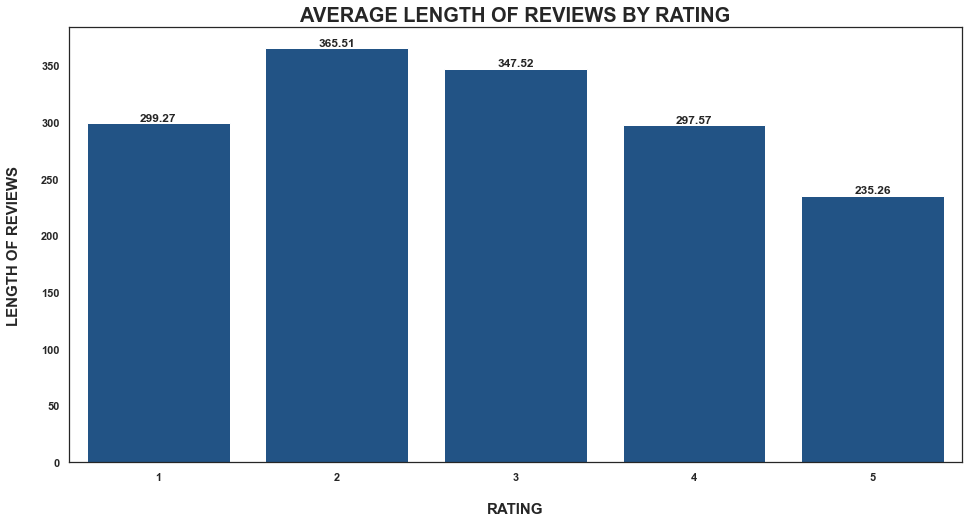

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [169]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.barplot(
    x=ContentLength.index, y=round(ContentLength["AverageLength"], 2), color="#115396"
)
plt.xlabel("RATING", size=15, labelpad=20, fontweight="bold")
plt.ylabel("LENGTH OF REVIEWS", size=15, labelpad=20, fontweight="bold")
plt.title("AVERAGE LENGTH OF REVIEWS BY RATING", size=20, weight="bold")
plt.yticks(fontweight="bold")
plt.xticks(fontweight="bold")
bar_values(ax)

The bar plots represents average length of review by rating. It seems that positively rated reviews tend to have shorter commentars in comparison with reviews having lower rating.
<br>In order to confirm that idea hypothesis testing was conducted:

**HYPOTHESIS TESTING** - Comparison of average lenth of length between positive and negative reviews.

In [170]:
LenPositiveRev = ContentData["length"].where(ContentData["rating"] > 3).copy()
LenPositiveRev = LenPositiveRev.dropna()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [171]:
LenNegativeRev = ContentData["length"].where(ContentData["rating"] < 3).copy()
LenNegativeRev = LenNegativeRev.dropna()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [172]:
print(
    f"Average length of positive reviews μ1: {round(LenPositiveRev.mean(), 2)},\nAverage length of negative reviews μ2: {round(LenNegativeRev.mean(), 2)}"
)

Average length of positive reviews μ1: 237.41,
Average length of negative reviews μ2: 318.65


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**HYPOTHESIS 0** - There is no significant difference in average length of reviews between positive and negative reviews.
<br>**H0: μ1=μ2**
<br>**HYPOTHESIS 1** - There is a significant difference in average length of reviews between positive and negative reviews.
<br>**H1: μ1≠μ2**

<br>**Significance level is 5%.**
<br>**α = 0.05**

In [173]:
alpha = 0.05

group_t_stats, group_p_value, degreesf = sm.stats.ttest_ind(
    LenPositiveRev, LenNegativeRev
)
print(
    "T-statistics value: {}".format(round(group_t_stats, 3)),
    "\n",
    "P-value: {}".format(round(group_p_value, 5)),
)

T-statistics value: -84.168 
 P-value: 0.0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [174]:
if group_p_value > alpha:
    print("We fail to reject null hypothesis.")
else:
    print("We reject the null hypothesis.")

We reject the null hypothesis.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**CONCLUSION**
<br>There is a sufficient evidence to conclude that average lenght of reviews between positively and negatively rated podcasts is significantly different.

Futher analysis concentrates on the content of reviews:

In [175]:
# Counting most common words in reviews
from collections import Counter

Counter(" ".join(ContentData["content"]).split()).most_common(50)

[('and', 1571302),
 ('the', 1470128),
 ('to', 1355544),
 ('I', 1215703),
 ('a', 896684),
 ('of', 736775),
 ('is', 619439),
 ('this', 440394),
 ('for', 439411),
 ('you', 424020),
 ('in', 412403),
 ('podcast', 368271),
 ('that', 350863),
 ('my', 315243),
 ('are', 297870),
 ('it', 297119),
 ('on', 291233),
 ('with', 282920),
 ('so', 270558),
 ('have', 262103),
 ('love', 242171),
 ('but', 206430),
 ('about', 204297),
 ('me', 184844),
 ('your', 175955),
 ('all', 167804),
 ('great', 166964),
 ('like', 165850),
 ('listen', 158492),
 ('be', 157506),
 ('The', 155800),
 ('as', 155771),
 ('This', 153300),
 ('was', 150787),
 ('they', 146240),
 ('from', 139134),
 ('just', 138084),
 ('not', 134443),
 ('listening', 130985),
 ('has', 129620),
 ('an', 118194),
 ('more', 117537),
 ('their', 116869),
 ('up', 113101),
 ('really', 107551),
 ('one', 105512),
 ('been', 105326),
 ('at', 103938),
 ('show', 103667),
 ('out', 103564)]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Counting most commom words in reviews was needed in order to exclude those from Wordcloud, because it is obvious that most frequent words will not be related to sme significant findings as it is just word usually used in the language.

#### VISUAL REPRESENTATION OF REVIEWS CONTENT USING WORDCLOUD

In [176]:
# Importing packages for creating wordcloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [177]:
# Converting content column to string
t1 = ContentData["content"].to_string()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

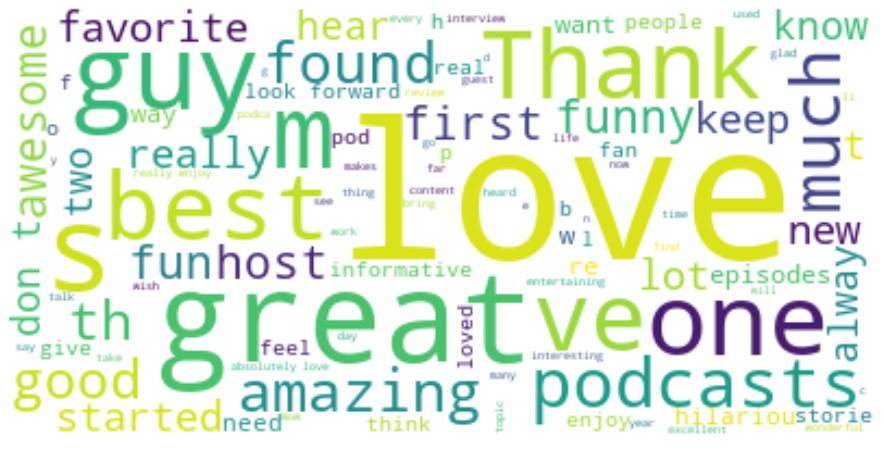

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [186]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(
    [
        "show",
        "make",
        "listened",
        "listening",
        "episode",
        "and",
        "the",
        "to",
        "I",
        "a",
        "of",
        "is",
        "this",
        "for",
        "you",
        "in",
        "podcast",
        "that",
        "my",
        "are",
        "it",
        "on",
        "with",
        "so",
        "have",
        "but",
        "about",
        "me",
        "your",
        "listen",
    ]
)

# Generate a word cloud image
wordcloud = WordCloud(
    stopwords=stopwords, max_words=100, background_color="white"
).generate(t1)

# Display the generated image:
plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#### VISUAL REPRESENTATION OF POSITIVELY RATED PODCATS REVIEWS

In [179]:
PositiveReviews = ContentData[ContentData["rating"] > 3]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [180]:
PositiveText = PositiveReviews["content"].to_string()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

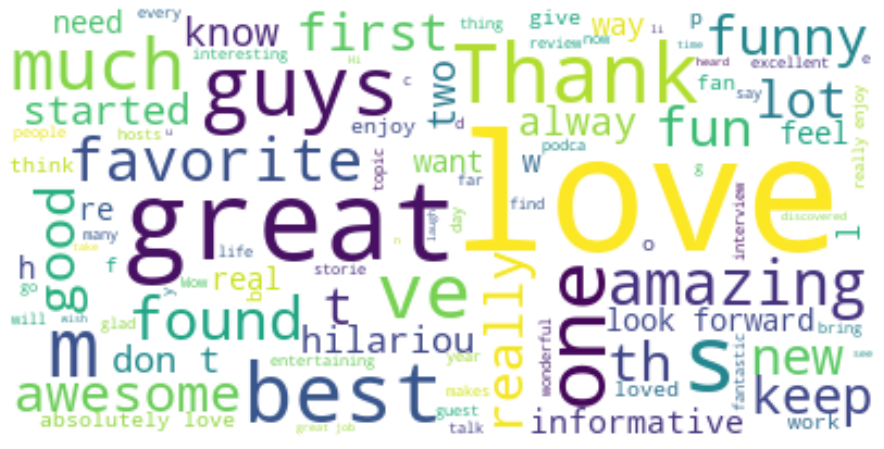

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [187]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(
    [
        "guy",
        "podcasts",
        "episodes",
        "hear",
        "host",
        "used",
        "content",
        "pod",
        "show",
        "make",
        "listened",
        "listening",
        "episode",
        "and",
        "the",
        "to",
        "I",
        "a",
        "of",
        "is",
        "this",
        "for",
        "you",
        "in",
        "podcast",
        "that",
        "my",
        "are",
        "it",
        "on",
        "with",
        "so",
        "have",
        "but",
        "about",
        "me",
        "your",
        "listen",
    ]
)

# Generate a word cloud image
wordcloud = WordCloud(
    stopwords=stopwords, max_words=100, background_color="white"
).generate(PositiveText)

# Display the generated image:
plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#### VISUAL REPRESENTATION OF NEGATIVELY RATED PODCASTS REVIEWS

In [182]:
NegativeReviews = ContentData[ContentData["rating"] < 3]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [183]:
NegativeText = NegativeReviews["content"].to_string()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

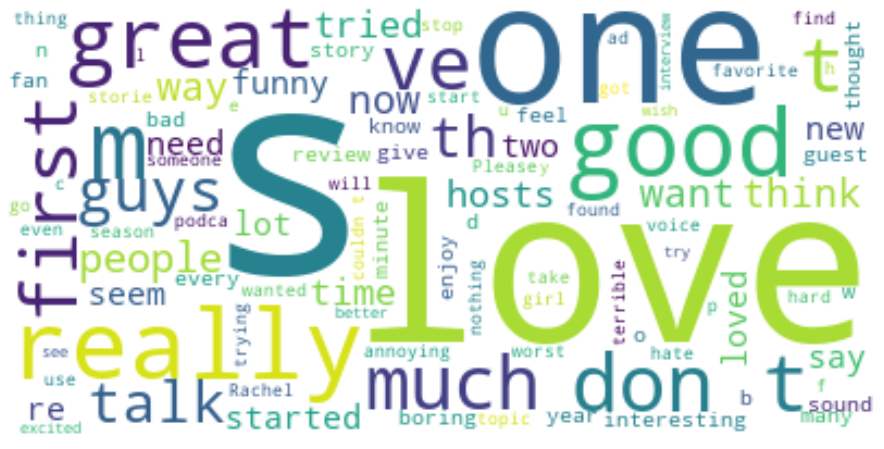

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [188]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(
    [
        "guy",
        "host",
        "podcasts",
        "episodes",
        "hear",
        "used",
        "content",
        "pod",
        "show",
        "make",
        "listened",
        "listening",
        "episode",
        "and",
        "the",
        "to",
        "I",
        "a",
        "of",
        "is",
        "this",
        "for",
        "you",
        "in",
        "podcast",
        "that",
        "my",
        "are",
        "it",
        "on",
        "with",
        "so",
        "have",
        "but",
        "about",
        "me",
        "your",
        "listen",
    ]
)

# Generate a word cloud image
wordcloud = WordCloud(
    stopwords=stopwords, max_words=100, background_color="white"
).generate(NegativeText)

# Display the generated image:
plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

At first glance wordclouds of positively and negatively rated reviews are really similar, but some differences in content can be seen by exploring it deeper, however, wordcoud is not the best way to explore content of reviews.

### CONCLUSION
Analysis of dataset was performed from different perspectives analysing ratings, reviews and its distribution in time. 
Main findings:
* Decreasing amount of reviews since the beginning of Covid-19 pandemy;
* There is a significant difference in length of reviews of positively and negatively rated podcasts;
* Users tend to listen to podcasts more often on working days;
* Users tend to listen to poscasts more of ten from 7 a.m. to 12 p.m. and from  5p.m. to 7 p.m.;
* Significant differences comparing content of reviews by rating were not observed.

### SUGGESTIONS FOR FURTHER ANALYSIS
* Advanced analysis of content
* Analyse changes in the amount of poscasts in time
* Perform hypothesis testing in order to discover Covid-19 influence on changes in user habits
* Collect more data about podcasts and series of podcasts